## Assignment 2
* Create two models for the relationship between height and weight based on gender
* Modify the code in Assignment 1 to ask for a person's gender as well as their height to produce an estimate of a person's weight using the models you created
* Find the weights and use those in your function (i.e. don't generate a model each time)

In [3]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt 
import statsmodels.formula.api as smf 

/usr/local/lib/python3.5/site-packages/matplotlib/__init__.py:1035: UserWarning: Duplicate key in file "/Users/zhizhou/.matplotlib/matplotlibrc", line #2
  (fname, cnt))
/usr/local/lib/python3.5/site-packages/matplotlib/__init__.py:1035: UserWarning: Duplicate key in file "/Users/zhizhou/.matplotlib/matplotlibrc", line #3
  (fname, cnt))


In [4]:
df = pd.read_csv("../data/heights_weights_genders.csv")

In [5]:
df.head(5)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [12]:
women = df[df['Gender']=='Female']
men = df[df['Gender']=='Male']

In [14]:
lm_f = smf.ols(formula="Weight~Height",data=women).fit()
lm_m = smf.ols(formula="Weight~Height",data=men).fit()

In [15]:
lm_f.params

Intercept   -246.013266
Height         5.994047
dtype: float64

In [16]:
lm_m.params

Intercept   -224.498841
Height         5.961774
dtype: float64

In [18]:
intercept_f, slope_f = lm_f.params
intercept_m, slope_m = lm_m.params

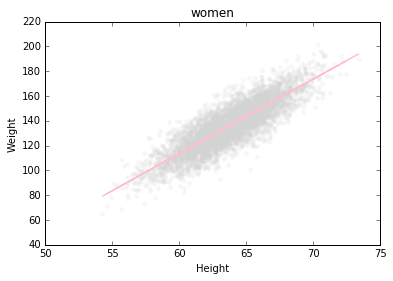

In [21]:
women.plot(kind="scatter",x="Height",y="Weight",color='lightgray',alpha=0.2,linewidth=0,title ="women")
plt.plot(women["Height"],slope_f*women["Height"]+intercept_f,"-",color="pink",alpha=1)

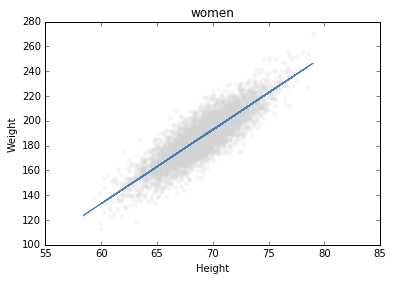

In [22]:
men.plot(kind="scatter",x="Height",y="Weight",color='lightgray',alpha=0.2,linewidth=0,title ="women")
plt.plot(men["Height"],slope_m*men["Height"]+intercept_m,"-",color="steelblue",alpha=1)

In [23]:
def get_weight(height,gender):
    if gender == "female":
        print("Your height is", height,"and your estimate weight will be", slope_f*height+intercept_f)
    elif gender == "male":
        print("Your height is", height,"and your estimate weight will be", slope_m*height+intercept_m)
    else:
        print("Gender must be male or female, try again!")

In [25]:
get_weight(60,"female")

Your height is 60 and your estimate weight will be 113.629531145
